In [48]:
import numpy as np
import matplotlib.pyplot as plt
from compfin import V, V_const

In [49]:
def sigma(t):
    return 0.2 + np.exp(-0.3*t)

def EulerMaruyama(m):
    S = S0
    # simple realization of delta W (p. 67)
    dW = np.sqrt(dt)*np.random.normal(0,1) 
    for i in range(0, m):
        # Euler-Maruyama (p. 73)
        S = S * (1 + r*dt + sigma(i*dt)*dW)
    return S

def runSim(K, N, m, v=False):
    """
    - K: Strike price
    - N: Number of paths
    - m: Number of time-steps
    - v: verbose output (default: False)
    """
    data_mc = np.zeros(N)
    for i in range(0, N):
        if v and i%(N/10) == 0: print("paths: {}".format(i))
        S = EulerMaruyama(m)
        data_mc[i] = max(K-S, 0)
    return np.mean(data_mc)

In [50]:
T = 2
N = 10000 # paths
m = 200 # time-steps
S0 = 1
r = 0.045
dt = T/m

k_min = 1e-7
k_max = 1
K_vals  = np.linspace(k_min, k_max, 11)
dK_vals = np.linspace(k_min, k_max, 50)

data_mc = [] # Monte-Carlo
data_bs = [] # Black-Scholes
data_mm = [] # Moment-Matching Black Scholes

for K in K_vals:
    print("\nstrike: {:.2f}\n".format(K))
    data_mc.append(runSim(K, N, m, v=False))

for K in dK_vals:
    data_bs.append(V(S0, 0, K))
    data_mm.append(V_const(S0, 0, K))


strike: 0.00


strike: 0.10


strike: 0.20


strike: 0.30


strike: 0.40


strike: 0.50


strike: 0.60


strike: 0.70


strike: 0.80


strike: 0.90


strike: 1.00



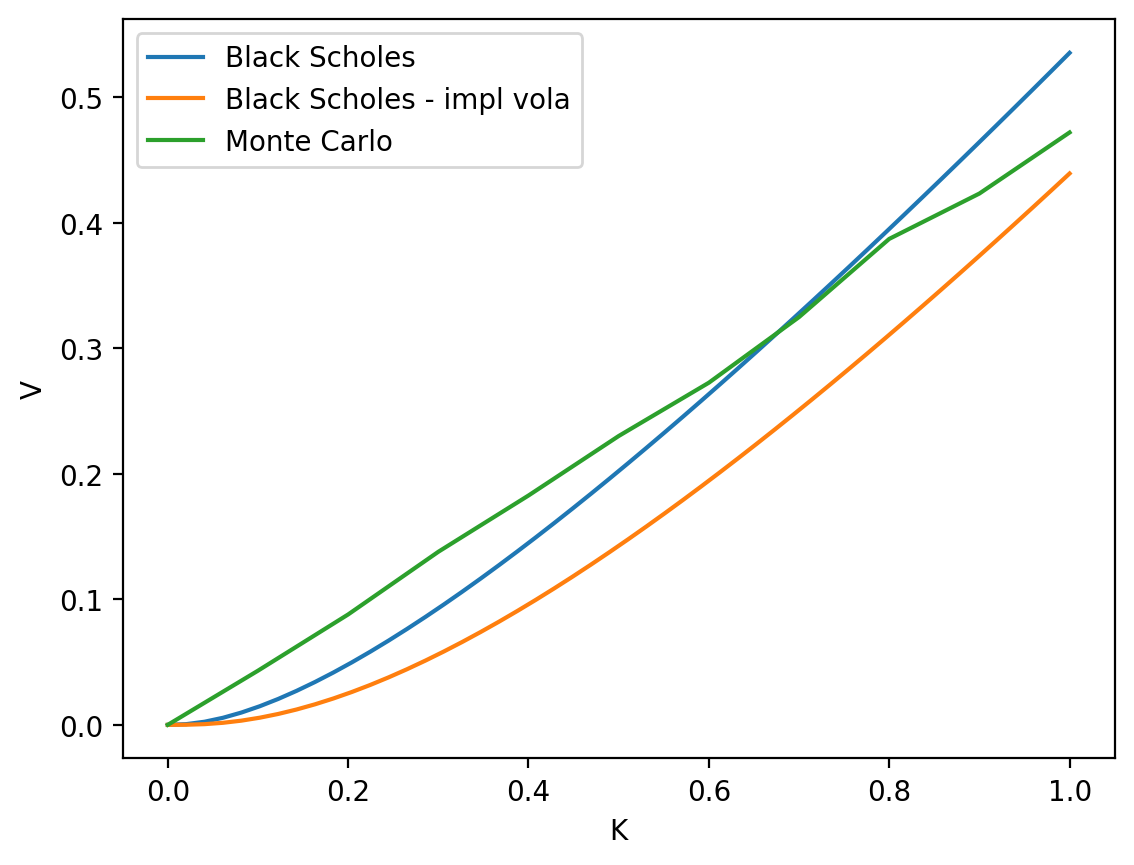

In [51]:
plt.figure(dpi=200)
plt.plot(dK_vals, data_bs, label="Black Scholes")
plt.plot(dK_vals, data_mm, label="Black Scholes - impl vola")
plt.plot(K_vals,  data_mc, label="Monte Carlo")
plt.xlabel("K")
plt.ylabel("V")
plt.legend()